**Assignment 1 NUMA41**

By mdu & max

**Problem 1**

Determine a polynomial $p$ of degree smaller or equal to three that fulfills $p(-1) = 2$ ,
$p(0) = 6$ , $p(2) = 4$ and $p(3) = 30$ in

**a)** the Lagrange basis

The desired result is $$p(x)=\sum_{k=0}^3L_k^3(x)y_k,$$ where the $y_k$'s are the function values given at the interpolation
points, and $L_k^n=\prod_{j=0, j\neq k}^n\frac{x-x_j}{x_k-x_j}$, $n=3$. So all that is left to do is find the 
Lagrange basis functions:

$L_0^3(x)=\frac{x}{-1}\frac{x-2}{-1-2}\frac{x-3}{-1-3}=\frac{-x}{12}(x-2)(x-3)$

$L_1^3(x)=\frac{x+1}{1}\frac{x-2}{-2}\frac{x-3}{-3}=\frac{1}{6}(x+1)(x-2)(x-3)$

$L_2^3(x)=\frac{x+1}{3}\frac{x}{2}\frac{x-3}{-1}=\frac{-x}{6}(x+1)(x-3)$

$L_3^3(x)=\frac{x+1}{4}\frac{x}{3}\frac{x-2}{1}=\frac{x}{12}(x+1)(x-2)$

Now, the interpolation polynomial in the Lagrange basis is:
$$p(x)=\frac{-x}{12}(x-2)(x-3)\cdot2+\frac{1}{6}(x+1)(x-2)(x-3)\cdot6+\frac{-x}{6}(x+1)(x-3)\cdot4+\frac{x}{12}(x+1)(x-2)\cdot30$$

**b)** the Newton basis

The desired result is $$p(x)=\sum_{i=0}^3a_in_i(x),$$ where $$n_i(x)=\prod_{j=0}^{i-1}(x-x_j),$$ and the $a_i$'s are the 
divided differences. 

First we calculate the divided differences as such:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def divdif(x,y):
    n = len(y)
    mat = np.zeros((n,n))
    mat[:,0]=y
    for j in range(1,n):
        for k in range(n-j): 
            mat[k][j] = (mat[k+1][j-1]-mat[k][j-1])/(x[k+j]-x[k])
    return mat

X=[-1,0,2,3]
Y=[2,6,4,30]

print(divdif(X,Y)[0])

[ 2.          4.         -1.66666667  2.66666667]


So $(a_0,a_1,a_2,a_3)=(2,4,-5/3,8/3)$, thus we can write the interpolation in the Newton basis:

$$p(x)=2+4\cdot(x+1)-\frac{5}{3}(x+1)x+\frac{8}{3}(x+1)x(x-2).$$ 

**Problem 2**

Prove the following theorem:

Given $n+1$ data points $(t_i,\ y_i)$ with mutually different $t_i$ , there is a unique polynomial
$p \in \mathcal{P}_n$ of degree $n$ which solves the interpolation problem

$$p(t_i)=y_i, \ i=0,...,n.$$

This proof consists of 2 elements, proving the existence and uniqueness of such a polynomial, the existence is really 
no surprise, this is given through our derivation of the Lagrange and Newton interpolation techniques. 

To prove uniqueness of the polynomial $p(x)$, assume there exists a polynomial $q(x)$ distinct from $p(x)$, that also 
solves the interpolation problem, i.e. $p(t_i)=y_i=q(t_i)$ and $p(x)\neq q(x)$. Both polynomials are of degree $n$
and therefore has $n$ roots. Polynomials form a linear space, and thus $p(x)-q(x)\in\mathcal{P}_n$, however,
it also holds that $p(t_i)-q(t_i)=0$, meaning the difference polynomial has $n+1$ roots, thus we have a contradiction.
$p(x)$ and $q(x)$ must be identical, uniqueness is shown.

**Problem 3**

Write a python program that plots a given function and an interpolation polynomial. 
To test this, use the following cases:

a) $f(t) = \exp(-4x^2)$, $t\in[-1,1]$. As data, use equidistant nodes that include the endpoints
and the function values in those nodes. The number of nodes should be $5$, then $12$.

b) $f(t) = \frac{1}{1+25x^2}$, $t\in[-1,1]$. As data, use equidistant nodes that include the endpoints
and the function values in those nodes. The number of nodes should be $15$, then $21$.

What do you see?

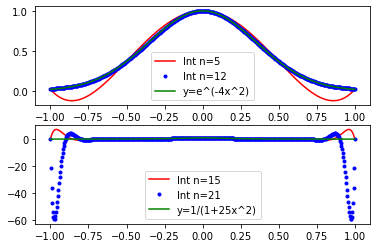

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Newton interpolation, uses divdif as defined above
def Ninterp(x,f,a,b,n):
    X = np.linspace(a, b, n)
    Y = f(X)
    A = divdif(X,Y)[0]
    p = A[0]
    for i in range(1,n):
        n=1
        for j in range(0,i):
            n=n*(x-X[j])
        p+=n*A[i]
    return p
##endpoints and interval
a = -1
b = 1
X1 = np.linspace(a,b,500)

def f1(x):
    return np.exp(-4*x**2)

def intf1(x,n):
    return Ninterp(x,f1,a,b,n)

def g1(x):
    return 1/(1+25*x**2)

def intg1(x,n):
    return Ninterp(x,g1,a,b,n)

plt.subplot(2,1,1)
plt.plot(X1,intf1(X1,5), "r", label="Int n=5")
plt.plot(X1,intf1(X1,12), "b.", label="Int n=12")
plt.plot(X1,f1(X1), "g", label="y=e^(-4x^2)")
plt.legend()
plt.subplot(2,1,2)
plt.plot(X1,intg1(X1,15), "r", label="Int n=15")
plt.plot(X1,intg1(X1,21), "b.", label="Int n=21")
plt.plot(X1,g1(X1), "g", label="y=1/(1+25x^2)")
plt.legend()
plt.show()

We see different results of increasing order for the first and second function. 
For the first function it is clear that increasing $n$ from $5$ to $12$ makes the interpolation function a better fit. 

The opposite is true for the last function, here increasing $n$ from $15$ to $21$ increases the interpolation error near
the endpoints of the interval.

Interestingly, the increasing error doesn't seem to occur around the radius of convergence for the power series expansion
of the function, namely near $\frac{-1}{5}$ and $\frac{1}{5}$, so something else is at play.

